In [5]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset
csv_path = "C:\\Users\\kamal\\OneDrive\\Desktop\\dataset1\\realfishdataset.csv"
df = pd.read_csv(csv_path)





FIND COLUMN RANGES FOR PREDICTION

In [6]:
for column in df.columns[:-1]:  
    min_value = df[column].min()
    max_value = df[column].max()
    
    print(f"Column: {column}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print("\n")

Column: ph
Minimum value: 5.5
Maximum value: 9.0


Column: temperature
Minimum value: 4.0
Maximum value: 35.0


Column: turbidity
Minimum value: 1.0
Maximum value: 15.8




PREPROCESSING STAGE

In [7]:

oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df.drop('fish', axis=1), df['fish'])


df_balanced = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_balanced['fish'] = y_resampled


label_encoder = LabelEncoder()
df_balanced['fish'] = label_encoder.fit_transform(df_balanced['fish'])


X = df_balanced[['ph', 'temperature', 'turbidity']].values
y = df_balanced['fish'].values


X_padded = pad_sequences(X, padding='post', dtype='float32')


X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

LSTM

Epoch 1/40
2429/2429 [==============================] - 11s 3ms/step - loss: 1.5478 - accuracy: 0.4628 - val_loss: 1.1383 - val_accuracy: 0.6004
Epoch 2/40
2429/2429 [==============================] - 7s 3ms/step - loss: 1.0307 - accuracy: 0.6245 - val_loss: 0.9651 - val_accuracy: 0.6757
Epoch 3/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.9140 - accuracy: 0.6647 - val_loss: 0.8695 - val_accuracy: 0.6748
Epoch 4/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.8329 - accuracy: 0.6872 - val_loss: 0.8277 - val_accuracy: 0.6960
Epoch 5/40
2429/2429 [==============================] - 7s 3ms/step - loss: 0.7632 - accuracy: 0.7081 - val_loss: 0.7275 - val_accuracy: 0.7210
Epoch 6/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.7040 - accuracy: 0.7291 - val_loss: 0.6642 - val_accuracy: 0.7586
Epoch 7/40
2429/2429 [==============================] - 7s 3ms/step - loss: 0.6502 - accuracy: 0.7528 - val_loss: 0.6206 - val_accuracy

c:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


608/608 [==============================] - 1s 1ms/step
Accuracy: 0.9606197879131061
Classification Report:
              precision    recall  f1-score   support

      karpio       1.00      1.00      1.00      1754
       katla       0.93      1.00      0.96      1744
         koi       1.00      1.00      1.00      1745
       magur       1.00      1.00      1.00      1753
      pangas       0.86      0.91      0.88      1723
       prawn       0.97      1.00      0.98      1787
         rui       1.00      1.00      1.00      1753
      shrimp       1.00      0.92      0.96      1734
   silverCup       1.00      0.88      0.94      1787
        sing       0.86      1.00      0.92      1808
     tilapia       1.00      0.86      0.92      1838

    accuracy                           0.96     19426
   macro avg       0.96      0.96      0.96     19426
weighted avg       0.96      0.96      0.96     19426



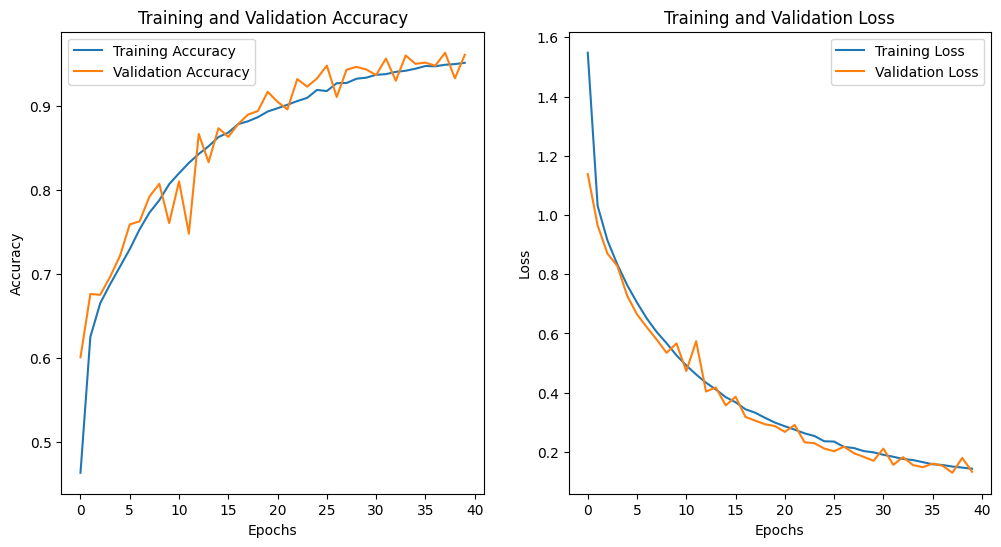

In [8]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(len(df_balanced['fish'].unique()), activation='softmax'))  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


model.save("lstm_model_fish.h5")

np.save("label_encoder_classes_lstm.npy", label_encoder.classes_)


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test_original, y_pred_original))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

BILSTM

Epoch 1/40
2429/2429 [==============================] - 14s 4ms/step - loss: 1.4952 - accuracy: 0.4899 - val_loss: 1.1875 - val_accuracy: 0.5451
Epoch 2/40
2429/2429 [==============================] - 8s 3ms/step - loss: 1.0705 - accuracy: 0.6133 - val_loss: 0.9957 - val_accuracy: 0.6697
Epoch 3/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.9441 - accuracy: 0.6570 - val_loss: 0.8792 - val_accuracy: 0.6946
Epoch 4/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.8433 - accuracy: 0.6926 - val_loss: 0.8213 - val_accuracy: 0.7037
Epoch 5/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.7583 - accuracy: 0.7239 - val_loss: 0.7275 - val_accuracy: 0.7342
Epoch 6/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.6863 - accuracy: 0.7481 - val_loss: 0.6957 - val_accuracy: 0.7447
Epoch 7/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.6208 - accuracy: 0.7662 - val_loss: 0.6019 - val_accuracy

c:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


608/608 [==============================] - 2s 2ms/step
Accuracy: 0.9121280757747349
Classification Report:
              precision    recall  f1-score   support

      karpio       0.98      1.00      0.99      1754
       katla       0.91      1.00      0.95      1744
         koi       1.00      1.00      1.00      1745
       magur       1.00      1.00      1.00      1753
      pangas       0.83      0.96      0.89      1723
       prawn       0.97      1.00      0.98      1787
         rui       0.98      1.00      0.99      1753
      shrimp       1.00      0.86      0.92      1734
   silverCup       0.66      0.99      0.79      1787
        sing       0.83      0.39      0.53      1808
     tilapia       1.00      0.85      0.92      1838

    accuracy                           0.91     19426
   macro avg       0.92      0.91      0.91     19426
weighted avg       0.92      0.91      0.91     19426



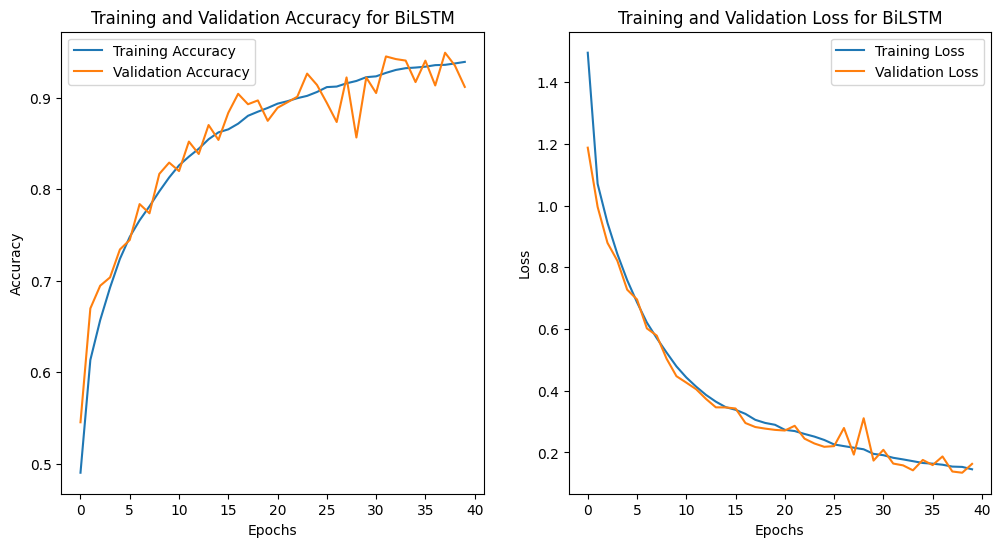

In [9]:
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dense(len(df_balanced['fish'].unique()), activation='softmax'))   
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))


model.save("bilstm_model_fish.h5")


np.save("label_encoder_classes_bilstm.npy", label_encoder.classes_)


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test_original, y_pred_original))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for BiLSTM')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for BiLSTM')

plt.show()

GRU

Epoch 1/40
2429/2429 [==============================] - 11s 4ms/step - loss: 1.4825 - accuracy: 0.4657 - val_loss: 1.0829 - val_accuracy: 0.6583
Epoch 2/40
2429/2429 [==============================] - 7s 3ms/step - loss: 0.9610 - accuracy: 0.6532 - val_loss: 0.8516 - val_accuracy: 0.6975
Epoch 3/40
2429/2429 [==============================] - 7s 3ms/step - loss: 0.7963 - accuracy: 0.7121 - val_loss: 0.7429 - val_accuracy: 0.7523
Epoch 4/40
2429/2429 [==============================] - 7s 3ms/step - loss: 0.6870 - accuracy: 0.7504 - val_loss: 0.6270 - val_accuracy: 0.7922
Epoch 5/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.6023 - accuracy: 0.7827 - val_loss: 0.5668 - val_accuracy: 0.7819
Epoch 6/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.5363 - accuracy: 0.8086 - val_loss: 0.5175 - val_accuracy: 0.7919
Epoch 7/40
2429/2429 [==============================] - 8s 3ms/step - loss: 0.4829 - accuracy: 0.8267 - val_loss: 0.4541 - val_accuracy

c:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


608/608 [==============================] - 1s 1ms/step
Accuracy (GRU): 0.951199423453104
Classification Report (GRU):
              precision    recall  f1-score   support

      karpio       1.00      1.00      1.00      1754
       katla       1.00      0.94      0.97      1744
         koi       1.00      1.00      1.00      1745
       magur       1.00      1.00      1.00      1753
      pangas       0.86      0.99      0.92      1723
       prawn       1.00      1.00      1.00      1787
         rui       1.00      1.00      1.00      1753
      shrimp       0.87      1.00      0.93      1734
   silverCup       0.91      0.88      0.89      1787
        sing       0.86      0.81      0.84      1808
     tilapia       1.00      0.86      0.92      1838

    accuracy                           0.95     19426
   macro avg       0.95      0.95      0.95     19426
weighted avg       0.95      0.95      0.95     19426



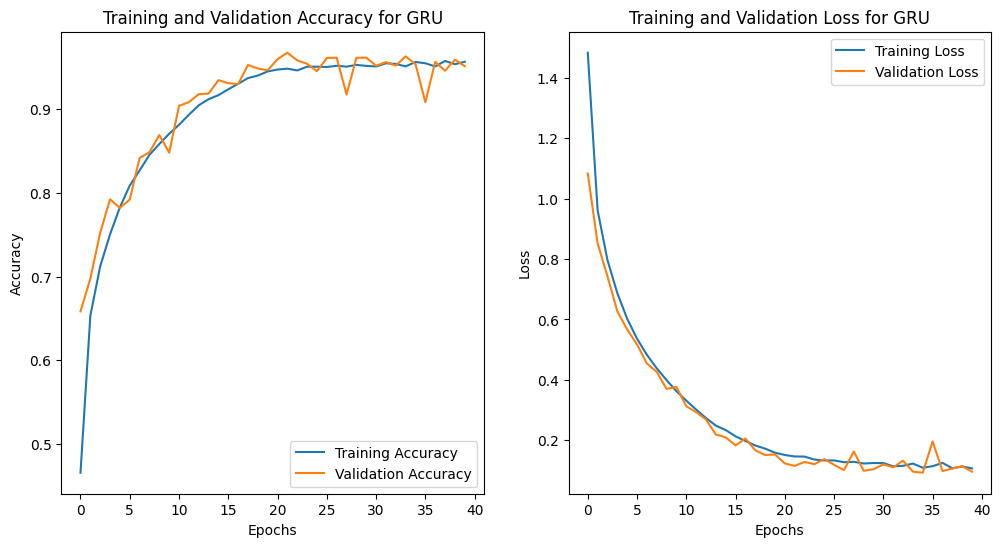

In [10]:
from tensorflow.keras.layers import GRU, Dense

model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dense(len(df_balanced['fish'].unique()), activation='softmax'))
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the GRU model
history_gru = model_gru.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Save the GRU model
model_gru.save("gru_model_fish.h5")


np.save("label_encoder_classes_gru.npy", label_encoder.classes_)

# Evaluate the GRU model
y_pred_probs_gru = model_gru.predict(X_test)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)

y_test_original_gru = label_encoder.inverse_transform(y_test)
y_pred_original_gru = label_encoder.inverse_transform(y_pred_gru)

accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f'Accuracy (GRU): {accuracy_gru}')
print('Classification Report (GRU):')
print(classification_report(y_test_original_gru, y_pred_original_gru))

# Plot training history for GRU
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for GRU')

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for GRU')

plt.show()